In [2]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
setwd("~//ZCWMT//Presentation/")
library(CASdatasets)


Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sp


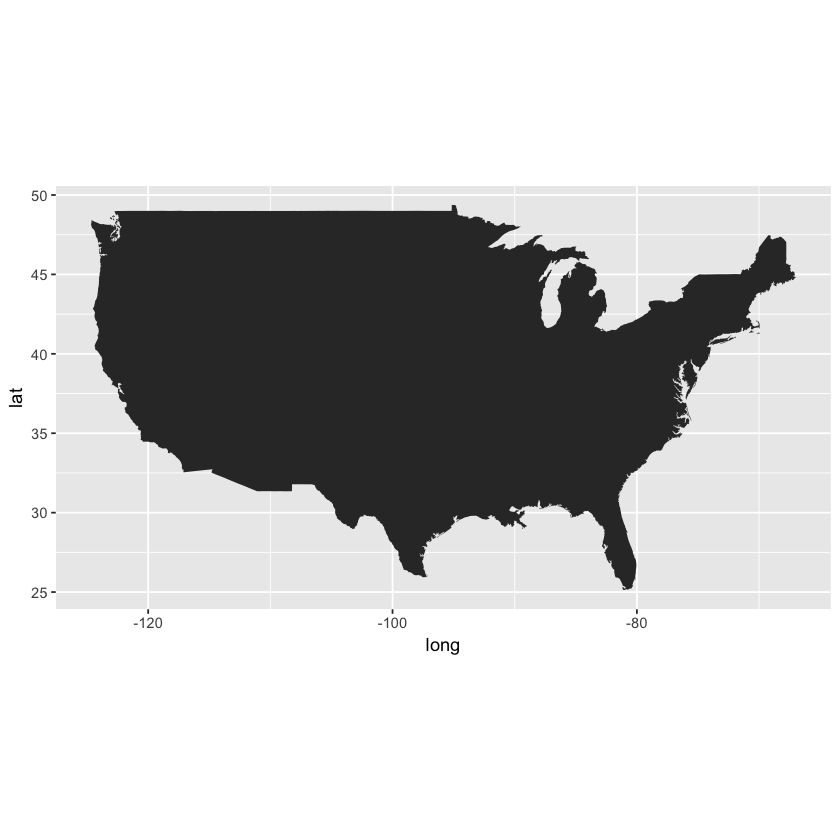

In [3]:
# Load U.S. Map 
usa <- map_data("usa")
gg1 <- ggplot() + geom_polygon(data = usa, aes(x=long, y = lat, group = group)) + 
  coord_fixed(1.3)
gg1

long,lat,group,order,region,subregion
-101.4078,29.74224,1,1,main,NA
-101.3906,29.74224,1,2,main,NA
-101.3620,29.65056,1,3,main,NA
-101.3505,29.63911,1,4,main,NA
-101.3219,29.63338,1,5,main,NA
-101.3047,29.64484,1,6,main,NA


In [8]:
## Loading csv data. 
strmEvents <- read.csv("StormEvents_locations-ftp_v1.0_d2014_c20180718.csv")
incomeKag <- read.csv("kaggle_income.csv")

# load U.S, map and plot extreme events. 

# I need to only get mainland U.S. 
onlyUS <- subset(strmEvents, (LONGITUDE > -140 & LONGITUDE < -50 & LATITUDE < 50 & 20 < LATITUDE ))

# Coordinate data preperation for plotting. 
corStrmEvents <- data.frame(lat = onlyUS$LATITUDE,
                            long = onlyUS$LONGITUDE,
                            names = onlyUS$EVENT_ID,
                            stringsAsFactors = FALSE)


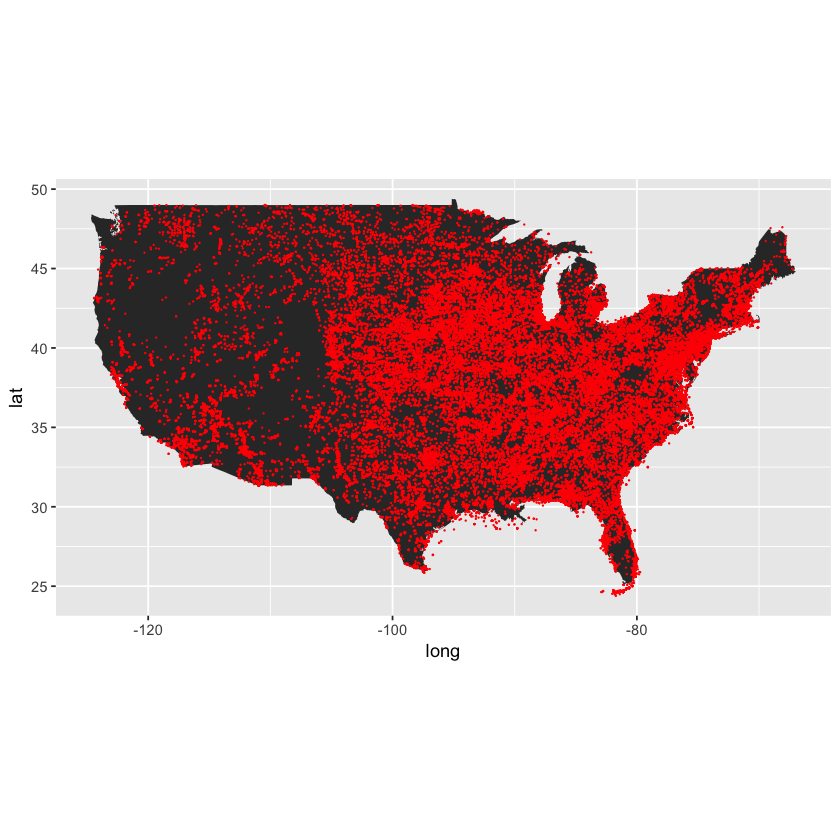

In [9]:

# Plotting
gg1 + 
  geom_point(data = corStrmEvents, 
             aes(x = long, y = lat), color = "red", size = exp(-100))

In [12]:
poorPeople <- subset(incomeKag, Lon > -140 & Mean < 50000 & Lat > 20 & Lat < 50)

corPoorPeople <- data.frame(lat = poorPeople$Lat,
                              long = poorPeople$Lon,
                              names= poorPeople$Place,
                              stringsAsFactors = FALSE)


richPeople <- subset(incomeKag, Lon > -140 & Mean > 100000 & Lat > 20 & Lat < 50)

corRichPeople <- data.frame(lat = richPeople$Lat,
                            long = richPeople$Lon,
                            names = richPeople$Place,
                            stringsAsFactors = FALSE)

gg2 = ggplot() + geom_polygon(data = usa, aes(x=long, y = lat, group = group)) + 
  coord_fixed(1.3) + geom_point(data = corPoorPeople, 
           aes(x = long, y = lat, group = "Poverty Class"), color = "yellow", size = 1) +
      geom_point(data = corStrmEvents,
           aes(x = long, y = lat, group = "Extreme Weather Events"), color = "red", size = 0.0001) +
      geom_point(data = corRichPeople,
           aes(x = long, y = lat, group = "Upper Middle Class"),color = "green", size = 1) 

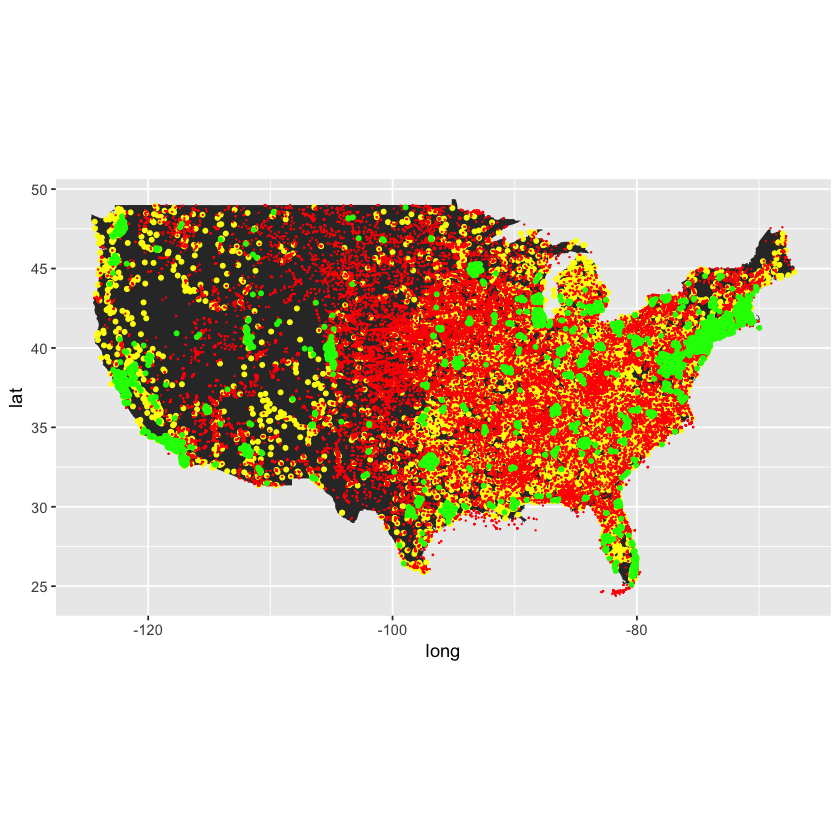

In [13]:
gg2 

In [8]:
# Calculate the distance for each poor person and rich person 
# to the nearest extreme weather event. 

calcDistance <- function(person,weather) {
  xE = weather$long
  yE = weather$lat 
  xS = person$long 
  yS = person$lat
  
  # Pythogram Theorem. (I know the earth is a curved surface but 
  # the curvature should be negligable if the locations are sufficiently close)
  return(distance = (xE - xS)^2 + (yE - yS)^2)
}

poorDistances <- c()
for (i in 1:length(corPoorPeople[,1])){
  poorDistances <- append(poorDistances,min(calcDistance(corPoorPeople[i,],corStrmEvents)))
}

richDistances <- c()
for (i in 1:length(corRichPeople[,1])){
  richDistances <- append(richDistances,min(calcDistance(corRichPeople[i,],corStrmEvents)))
}

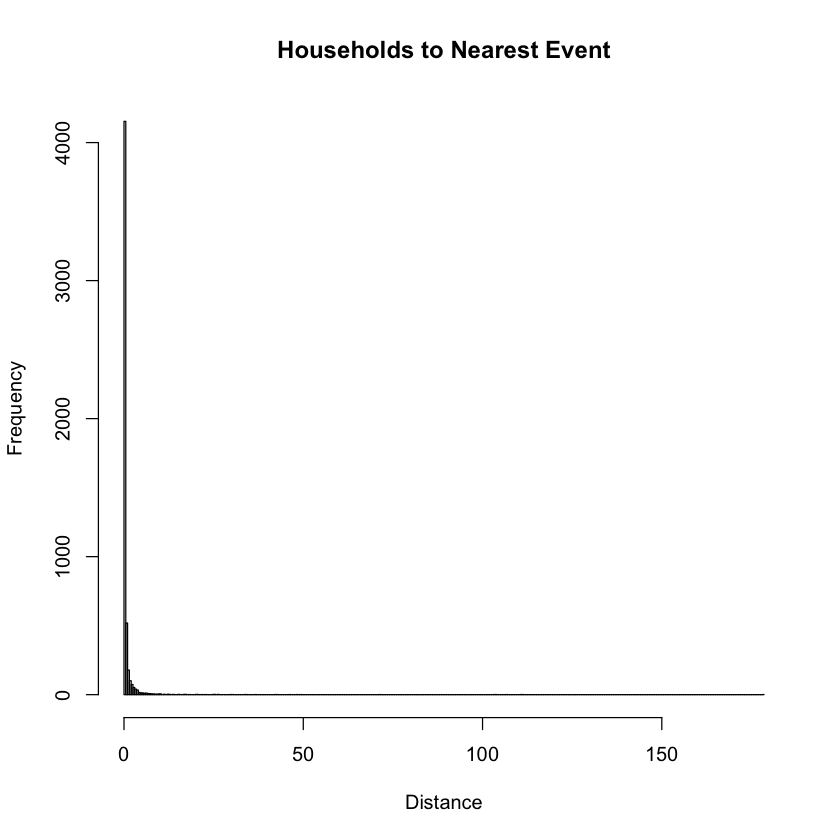

In [15]:
hist((c(richDistances,poorDistances)*110.574),
     main="Households to Nearest Event",
     xlab = "Distance",
     breaks = 500)

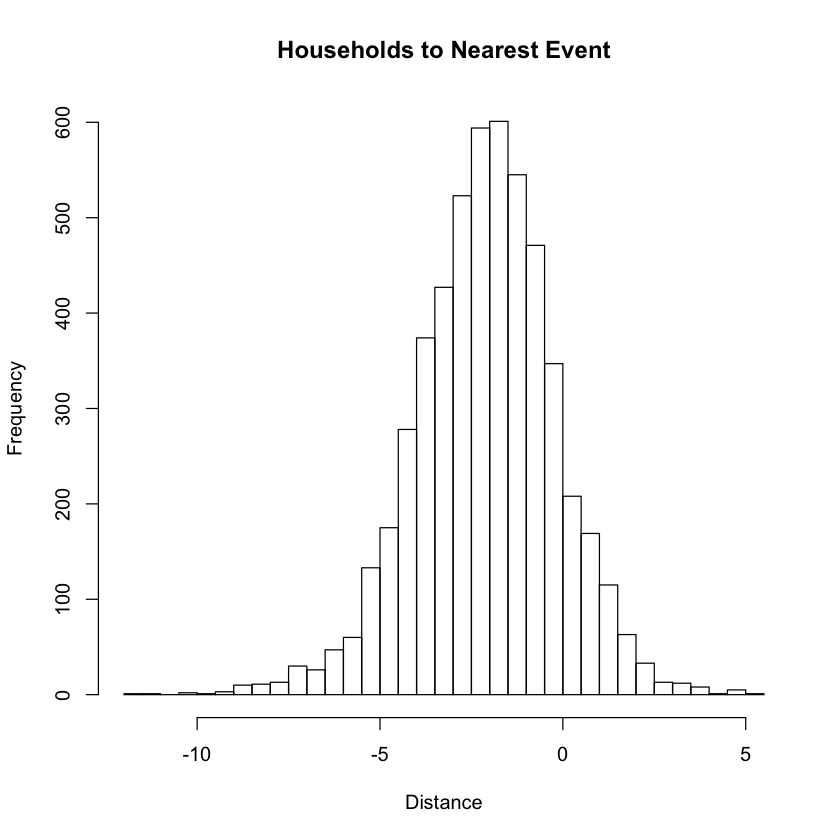

In [18]:
hist(log(c(richDistances,poorDistances)*110.574),
     main="Households to Nearest Event",
     xlab = "Distance",
     breaks = 50)

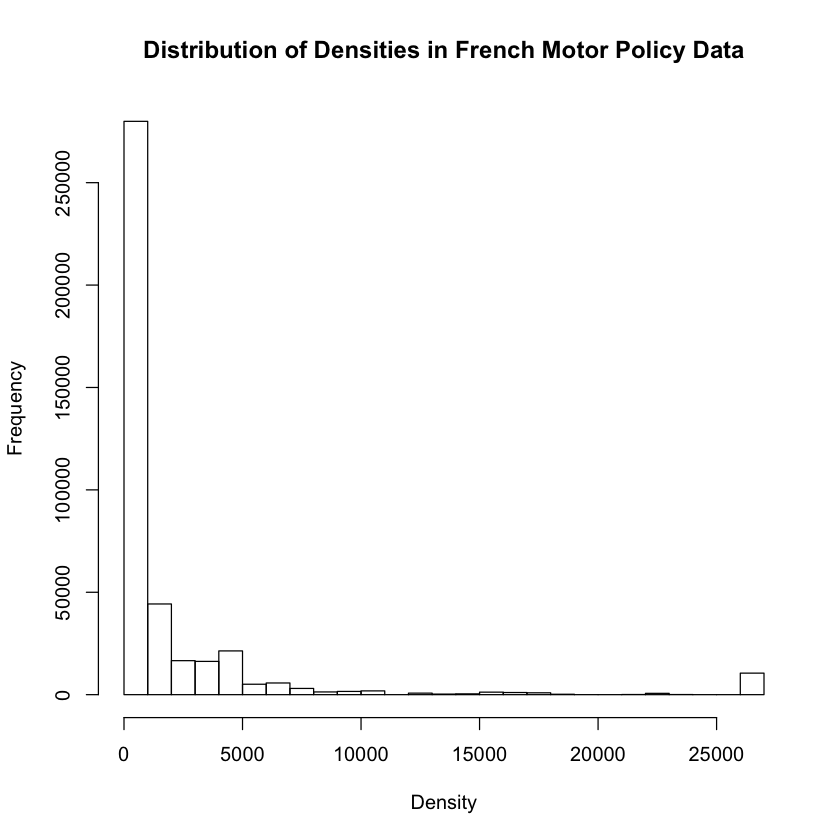

In [26]:
library(CASdatasets)
data(freMTPLfreq)
fre <- freMTPLfreq
hist(fre$Density, xlab = "Density", ylab = "Frequency", main = "Distribution of Densities in French Motor Policy Data")

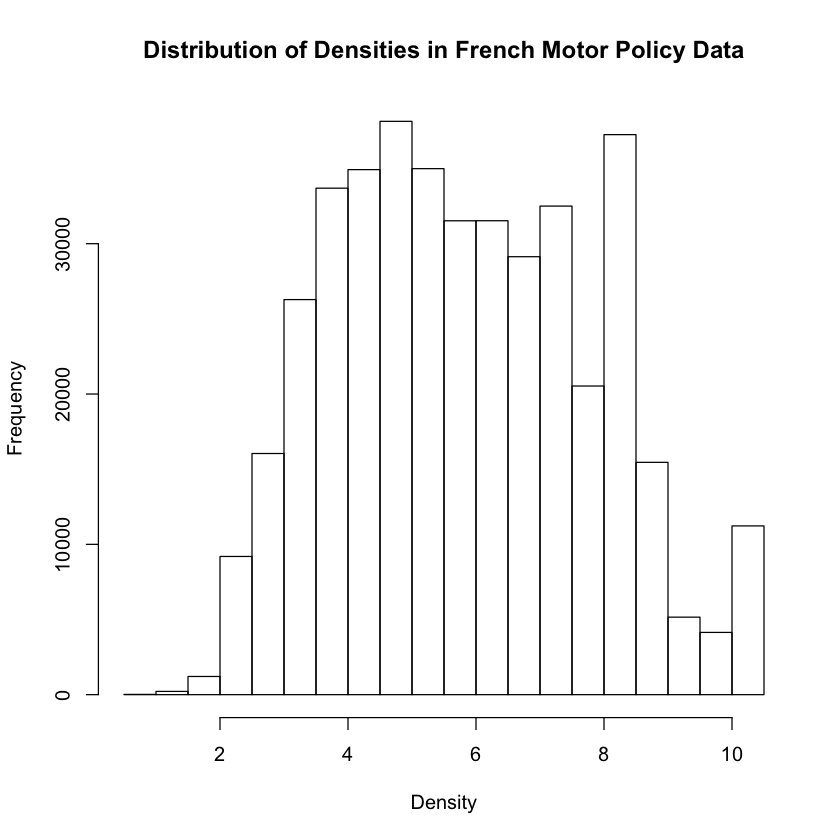

In [27]:
hist(log(fre$Density), xlab = "Density", ylab = "Frequency", main = "Distribution of Densities in French Motor Policy Data")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:26: unexpected ','
1: 
2: plot(Normal(1,2), fill=(0,
                            ^


ERROR: Error in parse(text = x, srcfile = src): <text>:2:5: unexpected '!'
1: 
2: plot!
       ^
